In [1]:
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [2]:
datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.05, 
    rescale=1./255,
    preprocessing_function=preprocess_input
)

train_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web',
    class_mode='categorical',
    batch_size=32,
    target_size=(299, 299),
    shuffle=True,
    subset='training',
) 


val_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web', 
    target_size=(299, 299),
    shuffle=True,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)

Found 19739 images belonging to 10 classes.
Found 1030 images belonging to 10 classes.


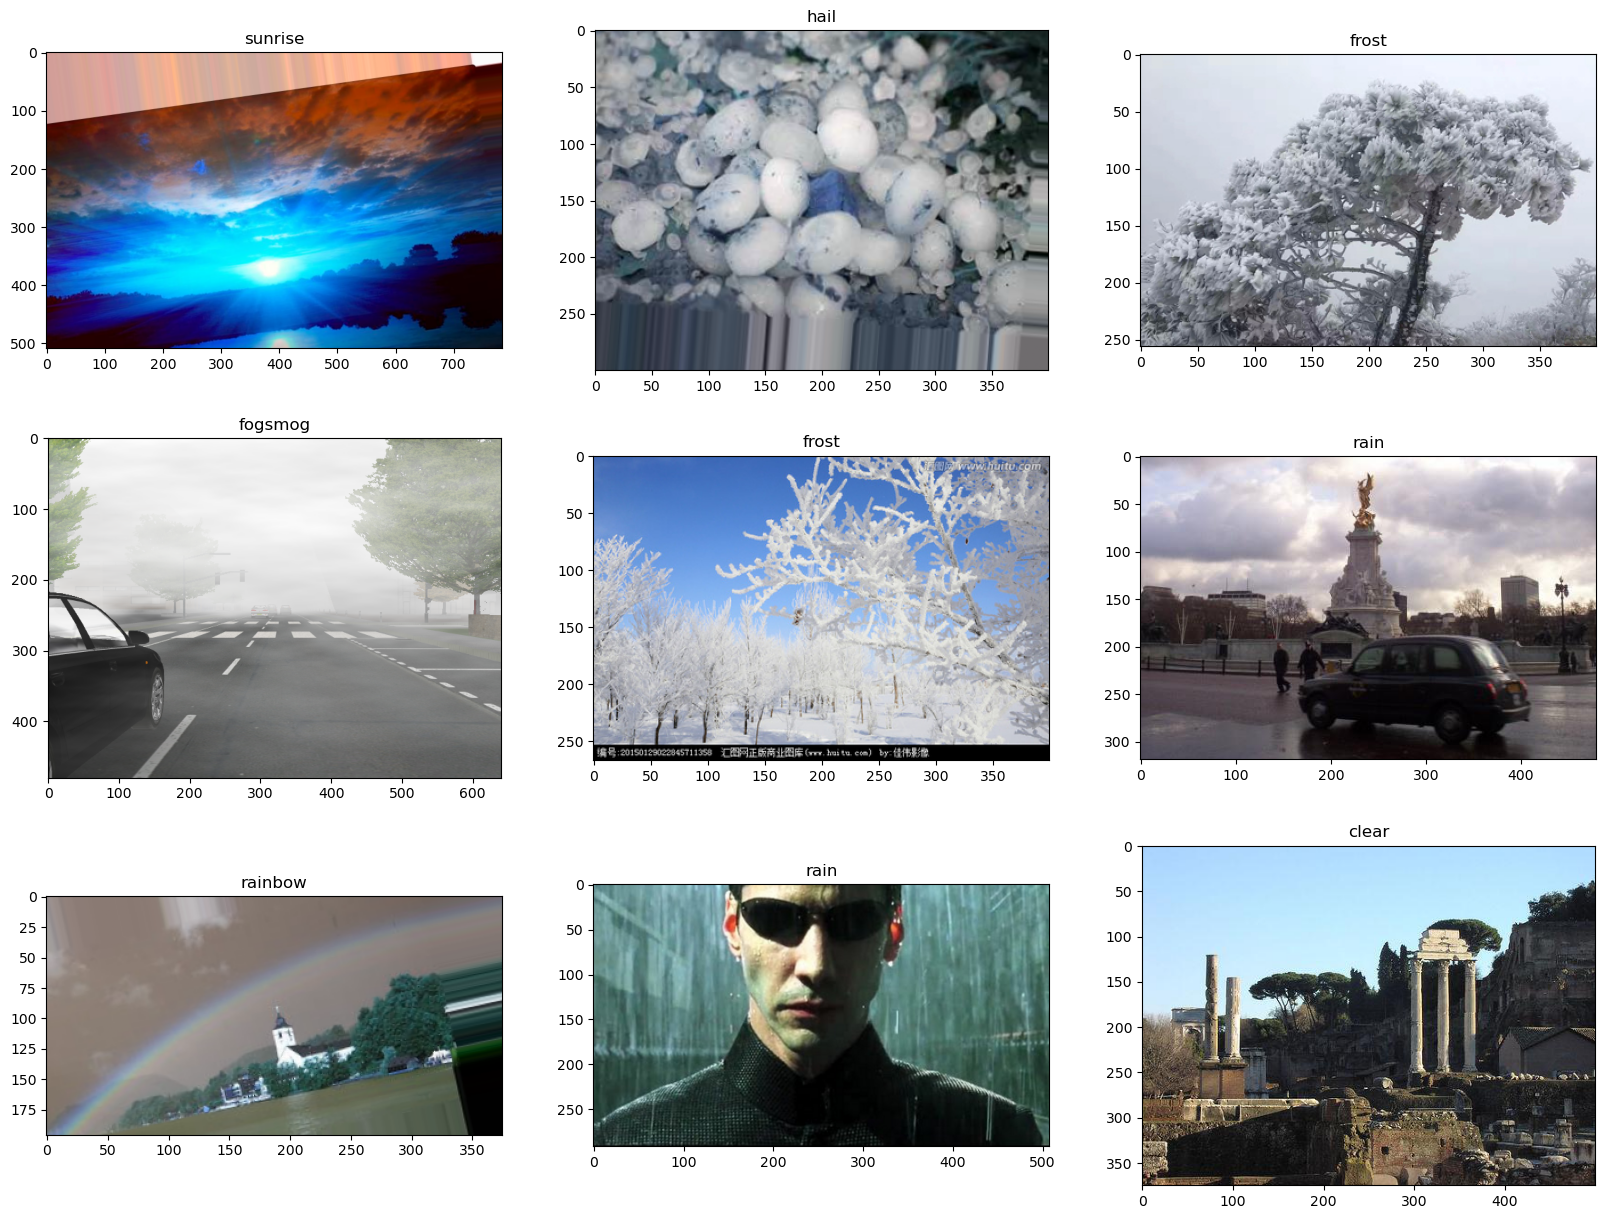

In [3]:
import random

fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [4]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [5]:
base_model =tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(299,299,3),
    classes=1000,
    classifier_activation="softmax",
)
base_model.trainable = False

83683744/83683744 [==============================] - 101s 1us/step


In [9]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
)
model = Sequential([
    base_model,
    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(299, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(149 , activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = 'sigmoid')
])
# берем вероятности найти о них макс и все сравнить с треш холдом , если значение больше трешхолда вывести макс и это значение 

model.compile(optimizer=adam_optimizer,
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         2359424   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 299)               612651    
                                                                 
 dropout_2 (Dropout)         (None, 299)               0         
                                                      

In [10]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=10,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=2)])
results = model.evaluate(val_ds)


Epoch 1/10
 46/617 [=>............................] - ETA: 36:12 - loss: 2.2425 - accuracy: 0.1630

KeyboardInterrupt: 

In [ ]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.50801
Test Accuracy: 84.12%


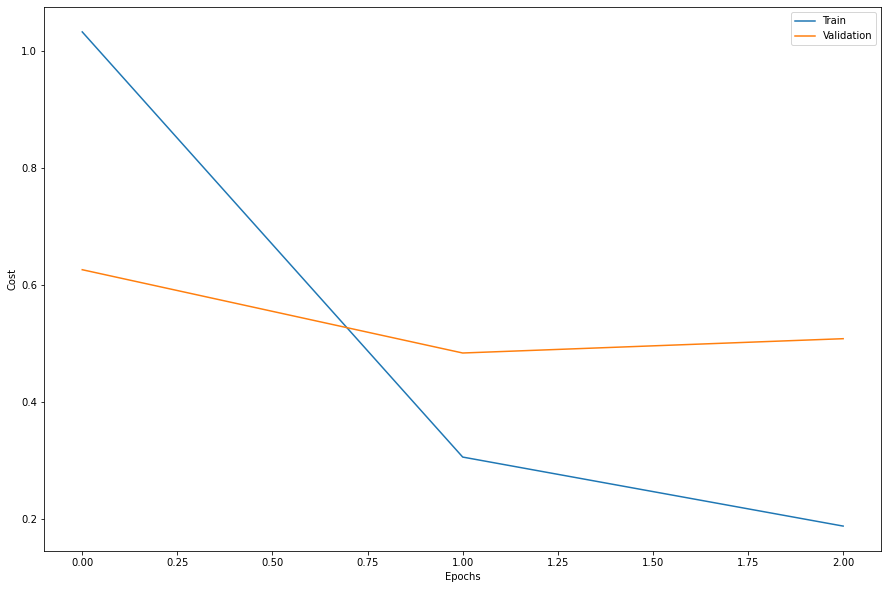

In [ ]:
print_loss(history)

In [ ]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')